# In Class Notebook, Week 07

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2021/blob/master/week07/inClass_week07.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

## Start off with bqplot

In [23]:
import bqplot
# for later:
import geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1. Data shape data (data/axis)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. Scales
sc_geo = bqplot.Mercator()

# 3. Axis (sort of in #1)

# 4. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…

In [4]:
# 1. Data shape data (data/axis)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. Scales
sc_geo = bqplot.Gnomonic()

# 3. Axis (sort of in #1)

# 4. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…

In [6]:
# 1. Data shape data (data/axis)
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. Scales
sc_geo = bqplot.AlbersUSA()

# 3. Axis (sort of in #1)

# 4. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…

In [7]:
!ls ~/opt/anaconda3/pkgs/bqplot-0.12.2-py_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Geopandas

In [8]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [9]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))

In [10]:
df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


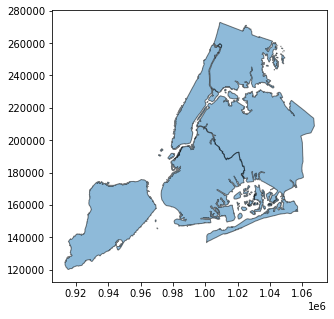

In [14]:
ax = df.plot(figsize=(5,5), alpha=0.5, edgecolor='k')

In [16]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [19]:
gdf_councils

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.827758e+08,209845.933925,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Angie Brix,2.007085e+08,145404.494177,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Clarissa Nickerson Fourman,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Greg Stock,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [20]:
gdf_councils.describe()

,OBJECTID_1,ShapeSTArea,ShapeSTLength
count,5.000000,5.000000e+00,5.000000
mean,813.000000,1.296012e+08,115655.550794
std,1.581139,6.131525e+07,61471.695860
min,811.000000,5.164512e+07,62243.277115
25%,812.000000,1.049800e+08,77363.320814
50%,813.000000,1.078965e+08,83420.727939
75%,814.000000,1.827758e+08,145404.494177
max,815.000000,2.007085e+08,209845.933925


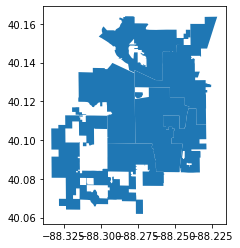

In [21]:
gdf_councils.plot()

In [24]:
import matplotlib.pyplot as plt

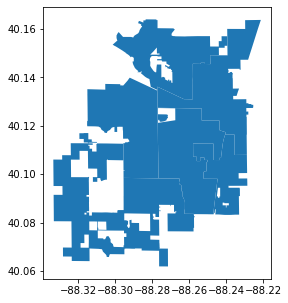

In [25]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

plt.show()

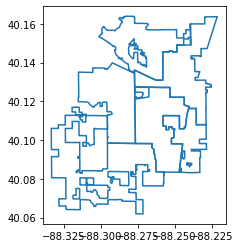

In [26]:
# example of shape-data specific plotting routine:
gdf_councils.boundary.plot()

In [27]:
# another shape-data specific function is to get bounding boxes:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [28]:
# specific to shape data: centers of our invidiual objects
gdf_councils.centroid

/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0    POINT (-88.29998 40.08731)
1    POINT (-88.28231 40.13389)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [29]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
# grab more Champaign city GIS data -- properties that the city owns
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

In [32]:
gdf_props.head()

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,TYPE,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,ShapeSTArea,ShapeSTLength,geometry
0,1,,,PWD,412001326010,0.755*,A,Drainage/Boneyard,Boneyard Channel,PWD,Boneyard Channel,Flood Hazard Area,101.0,MHP,32930.497803,897.925620,"POLYGON ((-88.25043 40.13085, -88.25044 40.130..."
1,2,,None,NSD,422012226003,4.432*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,1930.800537,272.145439,"POLYGON ((-88.24300 40.12699, -88.24300 40.127..."
2,3,,None,NSD,422012226004,0.181*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,7915.196533,372.150616,"POLYGON ((-88.24300 40.12681, -88.24300 40.126..."
3,4,,None,NSD,422012226005,0.186*,D,City Redevelopment,Beardsley Park Plan,NSD,1108 N Neil,Neighborhood Plan,1.0,SF 1,8104.292847,377.890980,"POLYGON ((-88.24344 40.12663, -88.24300 40.126..."
4,5,,None,NSD,422012226006,0.185*,D,City Redevelopment,Beardsley Park Plan,NSD,1106 N Neil,Neighborhood Plan,1.0,SF 1,8088.671143,377.710096,"POLYGON ((-88.24344 40.12645, -88.24299 40.126..."


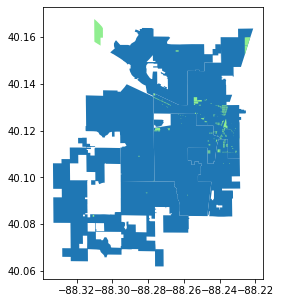

In [37]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=1.0)

gdf_props.plot(ax=ax, color='lightgreen', alpha=1.0)

plt.show()

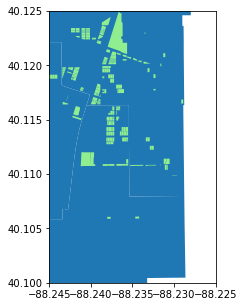

In [38]:
# let's zoom in to where we would be if we were in person right now!
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=1.0)

gdf_props.plot(ax=ax, color='lightgreen', alpha=1.0)

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

In [39]:
gdf_apt = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

In [41]:
gdf_apt.head()

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19657.997437,929.167804,None,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19735.512329,950.194217,None,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13970.178833,678.398035,None,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19739.423340,941.358477,None,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13065.121582,636.744457,None,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."


In [44]:
# we can add another layer, but color by a specific data attribute, in this case, 
# let's choose the number of stories in the building
gdf_apt['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', None, '16', '13'], dtype=object)

In [46]:
# If we have a None -- we'll turn that into a zero (recall in Python None is a Null value)
gdf_apt.loc[gdf_apt['Stories'].isnull()]

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
2023,2065,3702-3716 Balcary Bay,412004374045,8,None,NaN,3702-3716 Balcary Bay,None,None,Building,...,None,None,None,None,None,Yes,5614.825806,337.484567,None,"POLYGON ((-88.30721 40.12940, -88.30721 40.129..."
2024,2066,3718-3732 Balcary Bay,412004374045,8,None,NaN,3718-3732 Balcary Bay,None,None,None,...,None,None,None,None,None,Yes,5523.739746,327.770243,None,"POLYGON ((-88.30776 40.12940, -88.30776 40.129..."
2025,2067,1901 Blackthorn Dr,452022433901,None,None,NaN,1901 Blackthorn Dr,None,None,None,...,All Recycling bill sent to 1901 Blackthorn Dr,None,None,None,None,Yes,863.590454,141.279106,None,"POLYGON ((-88.27878 40.08716, -88.27878 40.087..."
2026,2068,1911 Blackthorn Dr,452022433901,None,None,NaN,1911 Blackthorn Dr,None,None,None,...,All Recycling bill sent to 1901 Blackthorn Dr,None,None,None,None,Yes,889.740112,144.884547,None,"POLYGON ((-88.27865 40.08742, -88.27865 40.087..."
2027,2069,1909 Blackthorn Dr,452022433901,None,None,NaN,1909 Blackthorn Dr,None,None,None,...,All Recycling bill sent to 1901 Blackthorn Dr,None,None,None,None,Yes,856.504395,149.155272,None,"POLYGON ((-88.27872 40.08735, -88.27872 40.087..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,3677,4520 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,10704.797974,565.541031,None,"POLYGON ((-88.31954 40.07632, -88.31964 40.076..."
2311,3678,4530 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,13027.200562,656.818556,None,"POLYGON ((-88.32046 40.07668, -88.32059 40.076..."
2312,3679,4550 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,11853.411499,521.384332,None,"POLYGON ((-88.32130 40.07657, -88.32145 40.076..."
2313,3680,4510 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,11073.249023,503.919987,None,"POLYGON ((-88.31920 40.07663, -88.31922 40.076..."


In [48]:
gdf_apt.loc[gdf_apt['Stories'].isnull(), 'Stories'] = '0' # set Null stories to the string '0'

Note: this is one choice we are making to change nulls into zeros -- we could have left of this data completely!  Or tagged as -1.

In [50]:
gdf_apt['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', '0', '16', '13'], dtype=object)

We note there are some empty entries -- set these to zeros as well:

In [52]:
gdf_apt.loc[gdf_apt['Stories']==' ']

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
597,598,209 E Healey St,462118105015,6,,657.0,209 E Healey St,,AI06-0115,Building,...,,,None,None,None,None,1002.769653,126.668062,None,"POLYGON ((-88.23587 40.11130, -88.23598 40.111..."
598,599,307 E Healey St,462118106006,16,,658.0,307 E Healey St,,AI09-0043,Building,...,,,None,None,None,Yes,6534.171021,434.053389,None,"POLYGON ((-88.23445 40.11095, -88.23445 40.111..."
599,600,309 E Healey St,462118106007,16,,659.0,Healey Court Apartments,,AI09-0044,Building,...,,,None,None,None,Yes,6636.536865,438.905404,None,"POLYGON ((-88.23433 40.11105, -88.23440 40.111..."
606,607,111 E Springfield Ave,462118101014,4,,666.0,111 E Springfield Ave,,AI08-0084,Building,...,,,None,None,None,None,2892.494385,218.629349,None,"POLYGON ((-88.23722 40.11232, -88.23722 40.112..."
607,608,107 E Springfield Ave,462118101014,60,,667.0,107 E Springfield Ave,,AI08-0084,Building,...,,,None,None,None,Yes,23890.443848,1694.540817,None,"POLYGON ((-88.23759 40.11241, -88.23759 40.112..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1649,116 N Walnut St,422012435018,3,,1217.0,116 N Walnut St,,AI09-0162,Building,...,,,None,None,None,None,1270.198486,170.127603,None,"POLYGON ((-88.24208 40.11682, -88.24206 40.116..."
1612,1654,402 S Lynn St,432013127001,3,,1173.0,402 S Lynn St,,AI10-0093,Building,...,,,None,None,None,None,771.259155,128.058002,None,"POLYGON ((-88.25154 40.11238, -88.25155 40.112..."
2124,2168,56 E Green St,432013232013,6,,1022.0,56 E Green St,,AI11-0014,Building,...,,,None,None,None,Yes,1543.858398,159.200027,None,"POLYGON ((-88.23932 40.11035, -88.23932 40.110..."
2125,2169,56 E Green St,432013232013,12,,1025.0,56 E Green St,,AI11-0014,Building,...,,,None,None,None,Yes,3540.819702,251.232985,None,"POLYGON ((-88.23948 40.11066, -88.23948 40.110..."


In [54]:
gdf_apt.loc[gdf_apt['Stories']==' ', 'Stories'] = '0'

In [55]:
gdf_apt['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', '0', '8', '16', '13'], dtype=object)

In [57]:
gdf_apt['Stories'] = pd.to_numeric(gdf_apt['Stories'],errors='coerce')
# changing our data to numeric and telling pandas to "figure out" any errors on its own

In [58]:
gdf_apt['Stories'].unique()

array([ 3,  2,  1,  5,  6,  4, 20, 24,  7,  0,  8, 16, 13])

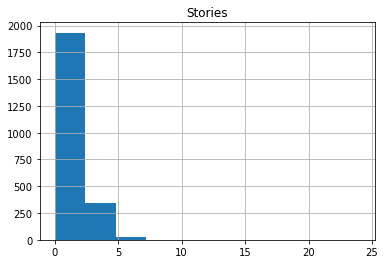

In [59]:
gdf_apt.hist(column='Stories')
plt.show()

Plot our cleaned apartment data over the city council map:

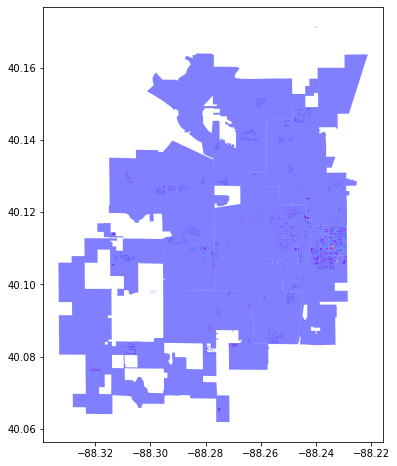

In [62]:
fig, ax = plt.subplots(figsize=(8,8))
gdf_councils.plot(ax=ax, color='blue', alpha=0.5)

gdf_apt.plot(column='Stories', ax=ax, cmap='rainbow')

plt.show()